In [1]:
#Poles and seats microbiota analysis between women-only and general subway wagons
library(ggplot2)
library(vegan)
library(phyloseq)
library (ape)
library(phytools)
library(tidyverse)
load("RData/rmetro6242.RData")

rmetro6242->rmetro
rmetro

Warning message:
“package ‘ggplot2’ was built under R version 3.5.2”Warning message:
“package ‘vegan’ was built under R version 3.5.2”Loading required package: permute
Warning message:
“package ‘permute’ was built under R version 3.5.2”Loading required package: lattice
This is vegan 2.5-5
Loading required package: maps
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ tibble  2.1.3       ✔ purrr   0.3.2  
✔ tidyr   0.8.3       ✔ dplyr   0.8.0.1
✔ readr   1.3.1       ✔ stringr 1.4.0  
✔ tibble  2.1.3       ✔ forcats 0.4.0  
Warning message:
“package ‘tibble’ was built under R version 3.5.2”Warning message:
“package ‘tidyr’ was built under R version 3.5.2”Warning message:
“package ‘purrr’ was built under R version 3.5.2”Warning message:
“package ‘dplyr’ was built under R version 3.5.2”Warning message:
“package ‘stringr’ was built under R version 3.5.2”Warning message:
“package ‘forcats’ was built under R version 3.5.2”── Conflicts ────────────────────────

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 29690 taxa and 89 samples ]
sample_data() Sample Data:       [ 89 samples by 84 sample variables ]
tax_table()   Taxonomy Table:    [ 29690 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 29690 tips and 29689 internal nodes ]

In [3]:
#Subseting surfaces containing women only wagons and regular wagons
sex=subset_samples(rmetro, sex_y_n=="y")
sex_asi=subset_samples(sex, indoor_surf=="asiento")
sex_tubo=subset_samples(sex, indoor_surf=="tubo")

pdf 
  2

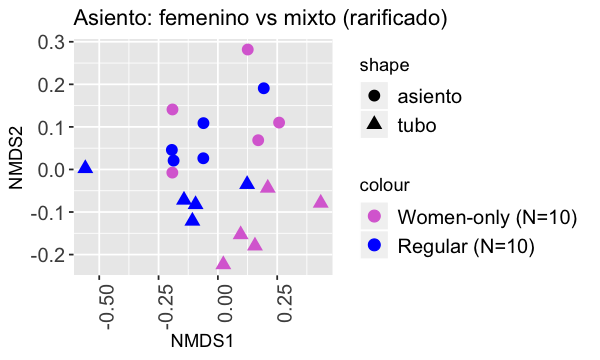

In [12]:
#Beta diversity by wagon type (sex differences)
ordu_all= ordinate(sex, "NMDS", "bray", weighted=F)

options(repr.plot.width=5, repr.plot.height=3)

p = plot_ordination(sex, ordu_all) 
p = p + geom_point(aes(color = wagons_type, shape=indoor_surf), size=3 )
p = p + scale_colour_manual(values = c( "orchid", "blue",
                        "gold1", "forestgreen", "firebrick", "mediumspringgreen", "darkorange1"), 
                        labels = c("Women-only (N=10)", "Regular (N=10)"))+
theme(axis.text.x = element_text(angle = 90, hjust = 1), axis.text=element_text(size=12),
      legend.text=element_text(size=12),strip.text.x = element_text(size = 12))

p

In [15]:
#Comparison including all data, poles and seats (analysis)
# Calculate distance matrix at OTU level
dist <- phyloseq::distance(sex, method = "bray")
# make a data frame from the sample_data
sampledf <- data.frame(sample_data(sex))
# Adonis test
adonis(dist ~ wagons_type, data = sampledf)
# Homogeneity of dispersion test
beta <- betadisper(dist, sampledf$wagons_type)
permutest(beta)


Call:
adonis(formula = dist ~ wagons_type, data = sampledf) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

            Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)  
wagons_type  1    0.3433 0.34328  1.3213 0.06839  0.096 .
Residuals   18    4.6764 0.25980         0.93161         
Total       19    5.0197                 1.00000         
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
          Df   Sum Sq   Mean Sq      F N.Perm Pr(>F)
Groups     1 0.001378 0.0013778 0.3118    999   0.58
Residuals 18 0.079533 0.0044185                     

In [175]:
#Comparison including seats (analysis)

# Calculate distance matrix at OTU level
dist <- phyloseq::distance(sex_asi, method = "bray")
# make a data frame from the sample_data
sampledf <- data.frame(sample_data(sex_asi))
# Adonis test
adonis(dist ~ wagons_type, data = sampledf)
# Homogeneity of dispersion test
beta <- betadisper(dist, sampledf$wagons_type)
permutest(beta)


Call:
adonis(formula = dist ~ wagons_type, data = sampledf) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

            Df SumsOfSqs MeanSqs F.Model     R2 Pr(>F)
wagons_type  1   0.22794 0.22794 0.95259 0.1064  0.599
Residuals    8   1.91427 0.23928         0.8936       
Total        9   2.14220                 1.0000       


Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
          Df   Sum Sq   Mean Sq      F N.Perm Pr(>F)
Groups     1 0.003039 0.0030393 0.5802    999   0.48
Residuals  8 0.041910 0.0052388                     

In [292]:
#Comparison including poles (analysis)
# Calculate distance matrix at OTU level
dist <- phyloseq::distance(sex_tubo, method = "bray")
# make a data frame from the sample_data
sampledf <- data.frame(sample_data(sex_tubo))
# Adonis test
adonis(dist ~ wagons_type, data = sampledf)
# Homogeneity of dispersion test
beta <- betadisper(dist, sampledf$wagons_type)
permutest(beta)


Call:
adonis(formula = dist ~ wagons_type, data = sampledf) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

            Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)
wagons_type  1   0.25084 0.25084  1.1358 0.12432  0.182
Residuals    8   1.76689 0.22086         0.87568       
Total        9   2.01773                 1.00000       


Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
          Df   Sum Sq   Mean Sq      F N.Perm Pr(>F)
Groups     1 0.000363 0.0003634 0.0433    999  0.859
Residuals  8 0.067162 0.0083952                     

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 30 rows containing missing values (geom_errorbar).”`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 30 rows containing missing values (geom_errorbar).”

pdf 
  2

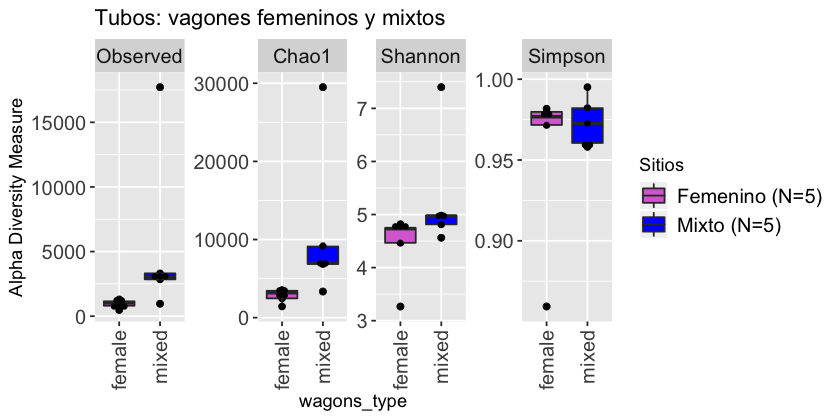

In [13]:
#Comparison for poles
options(repr.plot.width=7, repr.plot.height=3.5)

A=plot_richness(sex_tubo, x= "wagons_type",measures = c("Chao1","Observed", "Shannon","Simpson"))
A=A+ geom_boxplot(aes(fill = wagons_type ))+
#geom_point(position = position_dodge(width = 0.75))+
geom_dotplot(binaxis='y', stackdir='center', dotsize=0.7)+
scale_fill_manual(values = c( "orchid", "blue"),      
                  name="Sitios",
                       labels = c("Femenino (N=5)", "Mixto (N=5)"))+
theme(axis.text.x = element_text(angle = 90, hjust = 1), axis.text=element_text(size=12),
      legend.text=element_text(size=12),strip.text.x = element_text(size = 12))
A


In [14]:
#Comparison for poles (analysis)

tubo=subset(data, data$indoor_surf=="tubo")

lapply(tubo[,2:5], function(x) {
  k=kruskal.test(x ~ tubo$wagons_type, na.action="na.omit")
  pv=k$p.value
  return(pv)
})


$observed
[1] 0.5912081

$chao1
[1] 0.7069464

$shannon
[1] 0.8298964

$simpson
[1] 0.4520988

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 30 rows containing missing values (geom_errorbar).”`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 30 rows containing missing values (geom_errorbar).”

pdf 
  2

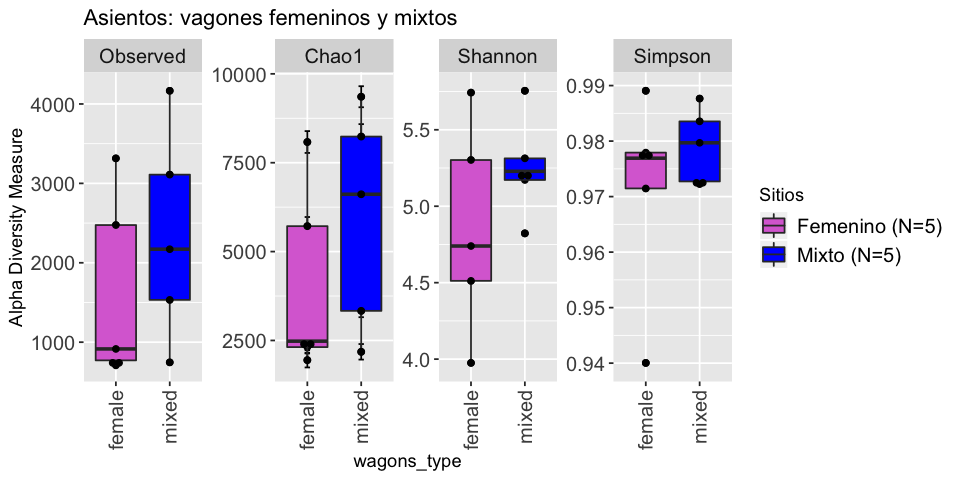

In [15]:
#Comparinson for seats
options(repr.plot.width=8, repr.plot.height=4)
#p + geom_boxplot(data=p$data, aes(x=human, y=value, color=NULL), alpha=0.1)

A=plot_richness(sex_asi, x= "wagons_type",measures = c("Chao1","Observed", "Shannon","Simpson"))
A=A+ geom_boxplot(aes(fill = wagons_type ))+
#geom_point(position = position_dodge(width = 0.75))+
geom_dotplot(binaxis='y', stackdir='center', dotsize=0.7)+
scale_fill_manual(values = c( "orchid", "blue"),      
                  name="Sitios",
                       labels = c("Femenino (N=5)", "Mixto (N=5)"))+
theme(axis.text.x = element_text(angle = 90, hjust = 1), axis.text=element_text(size=12),
      legend.text=element_text(size=12),strip.text.x = element_text(size = 12))+
labs(title="Asientos: vagones femeninos y mixtos")

A
pdf(file="sex_alpha_asiento_otu.pdf", width=6,height=3, useDingbats=FALSE) 
A
dev.off()

In [16]:
#Comparison for seats (analysis)
asi=subset(data, data$indoor_surf=="asiento")

lapply(asi[,2:5], function(x) {
  k=kruskal.test(x ~ asi$wagons_type)
  pv=k$p.value
  return(pv)
})



$observed
[1] 0.7632179

$chao1
[1] 0.8017768

$shannon
[1] 0.5807387

$simpson
[1] 0.3661155